In [1]:
import gym
import numpy as np
import time, pickle, os
from IPython.display import clear_output
import random
import matplotlib.pyplot as plt
import util5 as u5
from collections import defaultdict
import seaborn as sns

oogabooga 3.3 pickle


In [3]:
env = gym.make('Taxi-v2')
env2 = gym.make('TaxiLarge-v0')
env3 = gym.make('TaxiLargeComplex-v0')

In [3]:
#results_small = np.load('results_small.npy').item()
#results_large = np.load('results_large.npy').item()
#results_complex = np.load('results_complex.npy').item()

#policy_complex, _, _ = results_complex['output'][10]
#print(results_complex['output'][10])
#u5.count(policy_complex, env3, counter_max=200)

In [6]:
# Hyperparameters
alpha = 0.1
gamma = 0.98
epsilon = 0.1

#Q_learning_train(env, alpha, gamma, epsilon, episodes)
#q_pol_small = u5.Q_learning_train(env, alpha = 0.2, gamma = 0.95, epsilon = 0.1, episodes = 100000)

In [18]:
q_pol_small = u5.Q_learning_train(env, alpha = 0.1, gamma = 0.98, epsilon = 0.1, episodes = 20001)
np.save('q_pol_small', q_pol_small)

Episode: 10000


Episode: 20000
Training finished.



In [45]:
q_pol_large = u5.Q_learning_train(env2, alpha = 0.8, gamma = 0.8, epsilon = 0.01, episodes = 20001)
np.save('q_pol_large', q_pol_large) 
#q_pol_complex4 = np.load('q_pol_complex4.npy')
pi_test, _, _ = q_pol_large
print(np.mean([u5.count(pi_test, env2) for i in range(1000)]))

Episode: 10000


Episode: 20000
Training finished.



23.735


In [3]:
#no index is 'normal' with success = 20, incorrect = -10, per-step = -1, congestion = -2, stoplight = -2
#2 is after changing the success-rewards to 50 from 20 keeping all else the same
#3 is after changing the success-rewards = 20 and the per-step rewards congestion and stoplights are worse
#4 is changing the penalty rewards to -30 from -10
#5 is reducing the per-step penalty rewards from -1 to -0.05 and -2 to -0.1

env3 = gym.make('TaxiLargeComplex-v0')

q_pol_complex = u5.Q_learning_train(env3, alpha=0.8, gamma=0.9, epsilon=0.1, episodes=20001)
np.save('q_pol_complex', q_pol_complex)

env3.close()

Episode: 10000


Episode: 20000
Training finished.



In [3]:
#print(np.max([u5.count(q_pol_complex[0], env3, counter_max=2000) for i in range(1000)]))


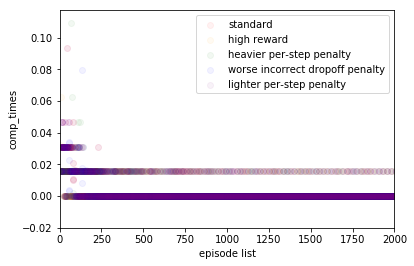

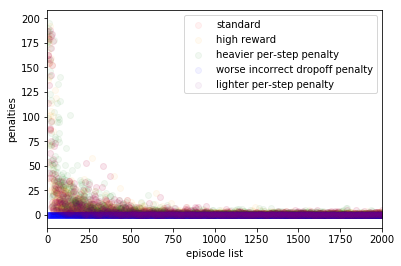

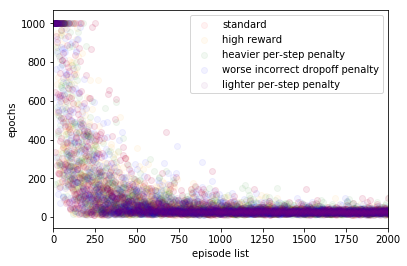

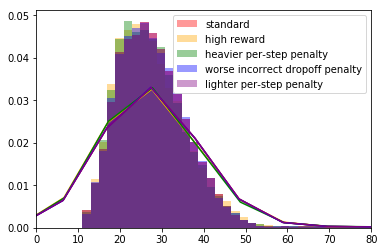

In [72]:
q_pol_complex = np.load('q_pol_complex.npy')
q_pol_complex2 = np.load('q_pol_complex2.npy')
q_pol_complex3 = np.load('q_pol_complex3.npy')
q_pol_complex4 = np.load('q_pol_complex4.npy')
q_pol_complex5 = np.load('q_pol_complex5.npy')

policy_complex, q_table_complex, results_complex = q_pol_complex
policy_complex2, q_table_complex2, results_complex2 = q_pol_complex2
policy_complex3, q_table_complex3, results_complex3 = q_pol_complex3
policy_complex4, q_table_complex4, results_complex4 = q_pol_complex4
policy_complex5, q_table_complex5, results_complex5 = q_pol_complex

q_complex_labels = ['standard', 'high reward', 'heavier per-step penalty',
                    'worse incorrect dropoff penalty', 'lighter per-step penalty']

for param in ['comp_times', 'penalties', 'epochs']:
    plt.scatter(results_complex['episode_list'], results_complex[param], 
                color='red', label=q_complex_labels[0], alpha=0.05)
    plt.scatter(results_complex2['episode_list'], results_complex2[param], 
                color='orange', label=q_complex_labels[1], alpha=0.05)
    plt.scatter(results_complex3['episode_list'], results_complex3[param], 
                color='green', label=q_complex_labels[2], alpha=0.05)
    plt.scatter(results_complex4['episode_list'], results_complex4[param], 
                color='blue', label=q_complex_labels[3], alpha=0.05)
    plt.scatter(results_complex5['episode_list'], results_complex5[param], 
                color='purple', label=q_complex_labels[4], alpha=0.05)
    
    plt.legend()
    plt.xlabel('episode list')
    plt.ylabel(param)
    plt.xlim(0, 2000)
    plt.show()


results_complex_listings = [results_complex, results_complex2, results_complex3, results_complex4, results_complex5]
colors=['red', 'orange', 'green', 'blue', 'purple']
for i, results_listing in enumerate(results_complex_listings): 
    sns.distplot(results_listing['epochs'], color=colors[i], bins=500, norm_hist=True, kde=True, label=q_complex_labels[i])
    
plt.legend()
plt.xlim(0, 80)
plt.show()

In [2]:
#results_complex_listings[i]['epochs']

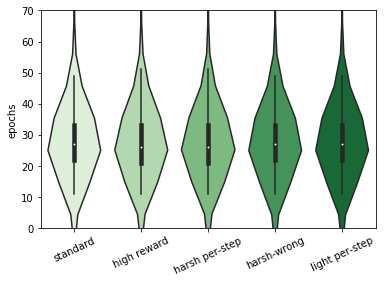

array([34.01419929, 33.68216589, 33.80095995, 34.05299735, 34.01419929])

In [76]:
# violin test
import pandas as pd
df = pd.DataFrame([results_complex_listings[i]['epochs'] for i in range(5)])
df = df.transpose()
df.columns=['standard', 'high reward', 'harsh per-step', 'harsh-wrong', 'light per-step']
ax = sns.violinplot(data=df, palette="Greens")
plt.ylim(0, 70)
plt.xticks(rotation=25)
plt.ylabel('epochs')
plt.show()

np.mean([results_complex_listings[i]['epochs'] for i in range(5)], axis=1)

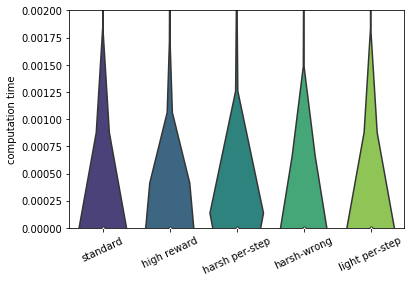

In [40]:
df = pd.DataFrame([results_complex_listings[i]['comp_times'] for i in range(5)])
df = df.transpose()
df.columns=['standard', 'high reward', 'harsh per-step', 'harsh-wrong', 'light per-step']
ax = sns.violinplot(data=df, palette='viridis')
plt.ylim(0, .0020)
plt.xticks(rotation=25)
plt.ylabel('computation time')
plt.show()

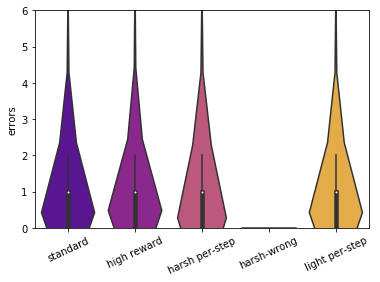

In [43]:
df = pd.DataFrame([results_complex_listings[i]['penalties'] for i in range(5)])
df = df.transpose()
df.columns=['standard', 'high reward', 'harsh per-step', 'harsh-wrong', 'light per-step']
ax = sns.violinplot(data=df, palette='plasma')
plt.ylim(0, 6)
plt.xticks(rotation=25)
plt.ylabel('errors')
plt.show()

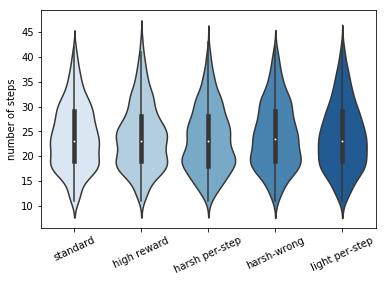

In [39]:
#number of steps for each of the optimatl

policy_complex_listings = [policy_complex, policy_complex2, policy_complex3, policy_complex4, policy_complex5]
#generate the step distrivutions

policy_steps_list = []
for policy in policy_complex_listings:
    policy_steps_list.append([u5.count(policy, env3) for i in range(1000)])

df = pd.DataFrame(policy_steps_list)
df = df.transpose()
df.columns=['standard', 'high reward', 'harsh per-step', 'harsh-wrong', 'light per-step']
ax = sns.violinplot(data=df, palette='Blues')
plt.xticks(rotation=25)
plt.ylabel('number of steps')
plt.show()

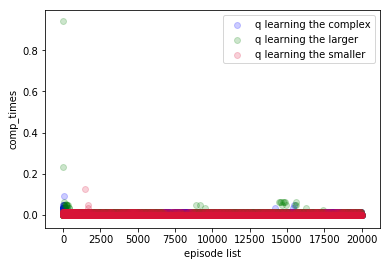

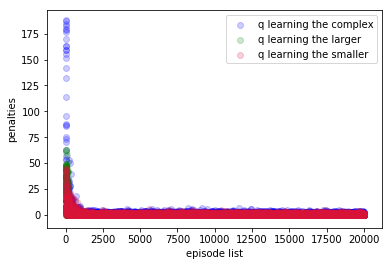

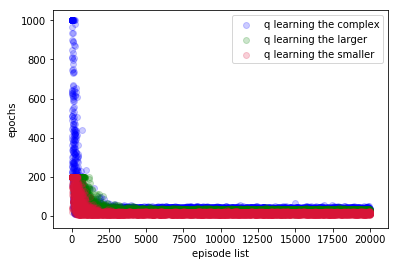

"    \nfor param in ['comp_times', 'penalties', 'epochs']:\n    plt.scatter(results_complex['episode_list'], results_complex[param], color='blue', label='q-complex reward=20', alpha=0.2)\n    plt.scatter(results_complex2['episode_list'], results_complex2[param], color='crimson', label='q-complex, reward=50', alpha=0.2)\n    plt.legend()\n    plt.xlabel('episode list')\n    plt.ylabel(param)\n    plt.show()\n"

In [46]:

save = False
if save:
    np.save('q_pol_small', q_pol_small)
    np.save('q_pol_large', q_pol_large)
    np.save('q_pol_complex', q_pol_complex)

q_pol_small = np.load('q_pol_small.npy')
q_pol_large = np.load('q_pol_large.npy')
q_pol_complex = np.load('q_pol_complex.npy')

policy_small, q_table_small, results_small = q_pol_small
policy_large, q_table_large, results_large = q_pol_large
policy_complex, q_table_complex, results_complex = q_pol_complex


'''
        results['epochs'].append(epochs)
        results['penalties'].append(penalties)
        results['comp_times'].append(time.time()-t0)
        results['episode_list'].append(i)
'''

for param in ['comp_times', 'penalties', 'epochs']:
    plt.scatter(results_complex['episode_list'], results_complex[param], color='blue', label='q learning the complex', alpha=0.2)
    plt.scatter(results_large['episode_list'], results_large[param], color='green', label='q learning the larger', alpha=0.2)
    plt.scatter(results_small['episode_list'], results_small[param], color='crimson', label='q learning the smaller', alpha=0.2)
    plt.legend()
    plt.xlabel('episode list')
    plt.ylabel(param)
    plt.show()
    

'''    
for param in ['comp_times', 'penalties', 'epochs']:
    plt.scatter(results_complex['episode_list'], results_complex[param], color='blue', label='q-complex reward=20', alpha=0.2)
    plt.scatter(results_complex2['episode_list'], results_complex2[param], color='crimson', label='q-complex, reward=50', alpha=0.2)
    plt.legend()
    plt.xlabel('episode list')
    plt.ylabel(param)
    plt.show()
'''

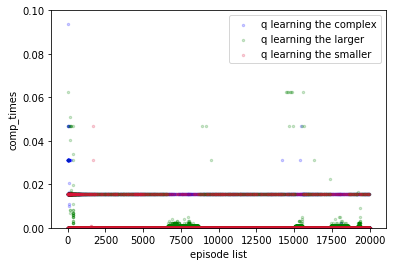

In [64]:
param='comp_times'
plt.scatter(results_complex['episode_list'], results_complex[param], s=6, color='blue', label='q learning the complex', alpha=0.2)
plt.scatter(results_large['episode_list'], results_large[param], s=6, color='green', label='q learning the larger', alpha=0.2)
plt.scatter(results_small['episode_list'], results_small[param], s=6, color='crimson', label='q learning the smaller', alpha=0.2)
plt.legend()
plt.xlabel('episode list')
plt.ylabel(param)
plt.ylim(0, 0.1)
plt.show()

In [48]:
small_counts = [u5.count(policy_small, env) for i in range(1000)]
large_counts = [u5.count(policy_large, env2) for i in range(1000)]
complex_counts = [u5.count(policy_complex, env3) for i in range(1000)]

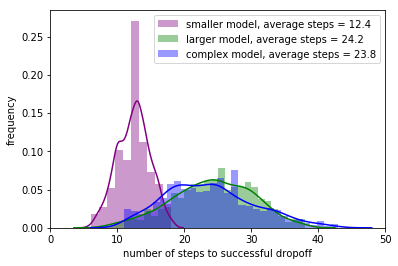

In [65]:
sns.distplot(small_counts, color='purple', label='smaller model, average steps = {:.1f}'.format(np.mean(small_counts)), bins=10, kde=True)
sns.distplot(large_counts, color='green', label='larger model, average steps = {:.1f}'.format(np.mean(large_counts)), bins=30, kde=True)
sns.distplot(complex_counts, color='blue', label='complex model, average steps = {:.1f}'.format(np.mean(complex_counts)), bins=30, kde=True)
plt.ylabel('frequency')
plt.xlabel('number of steps to successful dropoff')
plt.xlim(0, 50)
plt.legend()
plt.show()

In [4]:
results_large = defaultdict(list)
results_small = defaultdict(list)
results_complex = defaultdict(list)
env3._max_episode_steps = 1000

for alpha in [0.1*i for i in range(1, 13)]:
    print('alpha = {:.1f}'.format(alpha))
    t0 = time.time()
    q_large = u5.Q_learning_train(env2, alpha=alpha, gamma=0.9, epsilon=0.1, episodes=10001, verbose=False)
    t1 = time.time()-t0
    t0 = time.time()
    q_small = u5.Q_learning_train(env, alpha=alpha, gamma=0.9, epsilon=0.1, episodes=10001, verbose=False)
    t2 = time.time()-t0
    t0 = time.time()
    q_complex = u5.Q_learning_train(env3, alpha=alpha, gamma=0.9, epsilon=0.1, episodes=10001, verbose=False)
    t3 = time.time()-t0
    
    policy_large, _, _ = q_large
    policy_small, _, _ = q_small
    policy_complex, _, _ = q_complex
    
    results_large['output'].append(q_large)
    results_large['alpha'].append(alpha)
    results_large['time'].append(t1)
    results_large['steps'].append(np.mean([u5.count(policy_large, env2) for i in range(1000)]))
    results_small['output'].append(q_small)
    results_small['alpha'].append(alpha)
    results_small['time'].append(t2)
    results_small['steps'].append(np.mean([u5.count(policy_small, env) for i in range(1000)]))
    results_complex['output'].append(q_complex)
    results_complex['alpha'].append(alpha)
    results_complex['time'].append(t3)
    results_complex['steps'].append(np.mean([u5.count(policy_complex, env3, counter_max=2000) for i in range(1000)]))

np.save('results_complex_alpha', results_complex)
np.save('results_large_alpha', results_large)
np.save('results_small_alpha', results_small)

alpha = 0.1


alpha = 0.2


alpha = 0.3


In [71]:
#np.save('results_complex', results_complex)
#np.save('results_large', results_large)
#np.save('results_small', results_small)


#results_small = np.load('results_small.npy').item()
#results_large = np.load('results_large.npy').item()
#results_complex = np.load('results_complex.npy').item

In [72]:
print('pook')

pook


In [4]:
results_l = defaultdict(list)
results_s = defaultdict(list)
results_c = defaultdict(list)

alpha = 0.8
param_name='gamma'

for param in [0.05*i for i in range(1, 20)]:
    print("gamma = {}".format(param))
    
    t0 = time.time()
    q_large = u5.Q_learning_train(env2, alpha=alpha, gamma=param, epsilon=0.1, episodes=10001, verbose=False)
    t1 = time.time()-t0
    t0 = time.time()
    q_small = u5.Q_learning_train(env, alpha=alpha, gamma=param, epsilon=0.1, episodes=10001, verbose=False)
    t2 = time.time()-t0
    t0 = time.time()
    q_complex = u5.Q_learning_train(env3, alpha=alpha, gamma=param, epsilon=0.1, episodes=10001, verbose=False)
    t3 = time.time()-t0
    
    policy_large, _, _ = q_large
    policy_small, _, _ = q_small
    policy_complex, _, _ = q_complex
    
    results_l['output'].append(q_large)
    results_l[param_name].append(param)
    results_l['time'].append(t1)
    results_l['steps'].append(np.mean([u5.count(policy_large, env2) for i in range(1000)]))
    results_s['output'].append(q_small)
    results_s[param_name].append(param)
    results_s['time'].append(t2)
    results_s['steps'].append(np.mean([u5.count(policy_small, env) for i in range(1000)]))
    results_c['output'].append(q_complex)
    results_c[param_name].append(param)
    results_c['time'].append(t3)
    results_c['steps'].append(np.mean([u5.count(policy_complex, env3) for i in range(1000)]))

results_large_gamma = results_l
results_small_gamma = results_s
results_complex_gamma = results_c

np.save('results_complex_gamma', results_complex_gamma)
np.save('results_large_gamma', results_large_gamma)
np.save('results_small_gamma', results_small_gamma)

print('finished')

gamma = 0.05


gamma = 0.1


gamma = 0.15000000000000002


gamma = 0.2


gamma = 0.25


gamma = 0.30000000000000004


gamma = 0.35000000000000003


gamma = 0.4


gamma = 0.45


gamma = 0.5


gamma = 0.55


gamma = 0.6000000000000001


gamma = 0.65


gamma = 0.7000000000000001


gamma = 0.75


gamma = 0.8


gamma = 0.8500000000000001


gamma = 0.9


gamma = 0.9500000000000001


finished


496 -2


NameError: name 'state_prev' is not defined

In [6]:
results_small_gamma = np.load('results_small_gamma.npy').item()
results_large_gamma = np.load('results_large_gamma.npy').item()
results_complex_gamma = np.load('results_complex_gamma.npy').item()

In [ ]:
#results_small_gamma['gamma']



TypeError: Required argument 'shape' (pos 2) not found

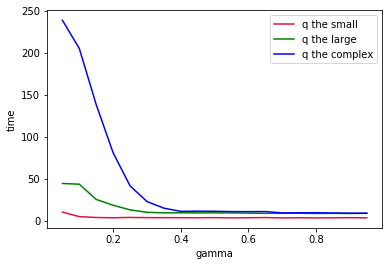

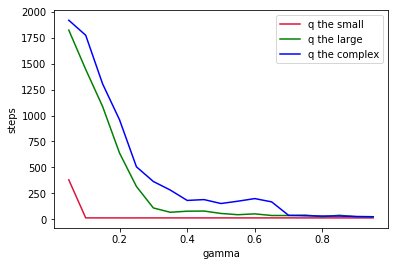

In [10]:
for param in ['time', 'steps']:
    plt.plot(results_small_gamma['gamma'], results_small_gamma[param], color="crimson", label="q the small")
    plt.plot(results_large_gamma['gamma'], results_large_gamma[param], color="green", label="q the large")
    plt.plot(results_complex_gamma['gamma'], results_complex_gamma[param], color="blue", label="q the complex")
    plt.ylabel(param)
    plt.xlabel('gamma')
    plt.legend()
    plt.show()

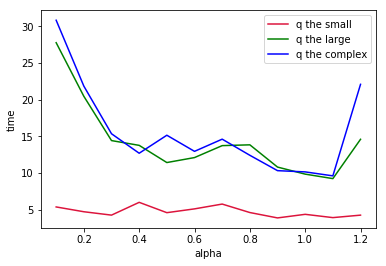

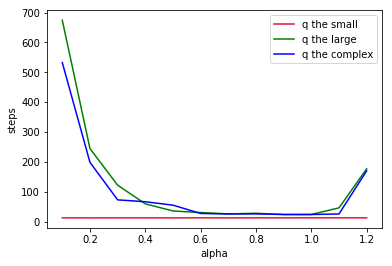

In [10]:
'''results_large['output'].append(q_large)
    results_large['alpha'].append(alpha)
    results_large['time'].append(t1)
    results_large['steps'].append([u5.count(policy_large, env2) for i in range(1000)])
    results_small['output'].append(q_small)
    '''

#temp fix
#results_small['steps'] = [np.mean(results_small['steps'][i]) for i in range(len(results_small['steps']))]
#results_large['steps'] = [np.mean(results_large['steps'][i]) for i in range(len(results_large['steps']))]
#results_complex['steps'] = [np.mean(results_complex['steps'][i]) for i in range(len(results_complex['steps']))]

results_small = np.load('results_small_alpha.npy').item()
results_large = np.load('results_large_alpha.npy').item()
results_complex = np.load('results_complex_alpha.npy').item()


for param in ['time', 'steps']:
    plt.plot(results_small['alpha'], results_small[param], color="crimson", label="q the small")
    plt.plot(results_large['alpha'], results_large[param], color="green", label="q the large")
    plt.plot(results_complex['alpha'], results_complex[param], color="blue", label="q the complex")
    plt.ylabel(param)
    plt.xlabel('alpha')
    plt.legend()
    plt.show()

defaultdict(list, {})

In [18]:
env3 = gym.make('TaxiLargeComplex-v0')
results = defaultdict(list)
for param in [500*i for i in range(1, 20)]:
    env3._max_episode_steps = param
    print('max episode steps = {}'.format(param))
    t0 = time.time()
    q_complex = u5.Q_learning_train(env3, alpha=0.9, gamma=0.8, epsilon=0.1, episodes=10001, verbose=False)
    t3 = time.time()-t0
    
    policy_complex, _, _ = q_complex
    
    results['output'].append(q_complex)
    results['max_episode_steps'].append(param)
    results['time'].append(t3)
    results['steps'].append(np.mean([u5.count(policy_complex, env3) for i in range(1000) if u5.count(policy_complex, env3) < 10000]))
    
results_complex_max_epochs = results
np.save('results_complex_max_epochs', results_complex_max_epochs)
env3.close()

max episode steps = 500


max episode steps = 1000


max episode steps = 1500


max episode steps = 2000


max episode steps = 2500


max episode steps = 3000


max episode steps = 3500


max episode steps = 4000


max episode steps = 4500


max episode steps = 5000


max episode steps = 5500


max episode steps = 6000


max episode steps = 6500


max episode steps = 7000


max episode steps = 7500


max episode steps = 8000


max episode steps = 8500


max episode steps = 9000


max episode steps = 9500


In [56]:
results_complex_max_epochs = np.load('results_complex_max_epochs.npy').item()
plot_results = results_complex_max_epochs

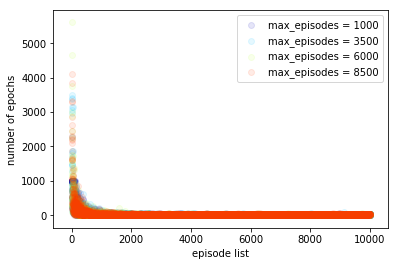

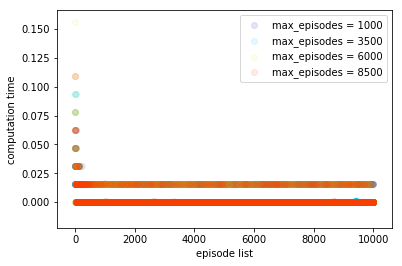

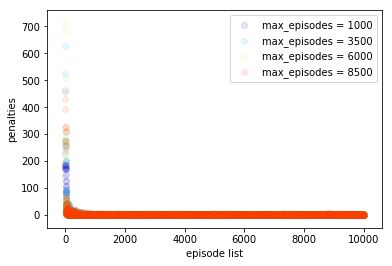

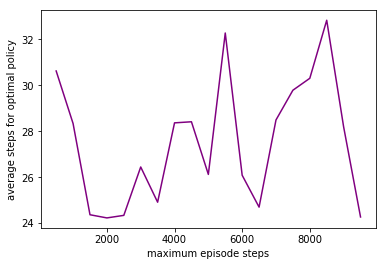

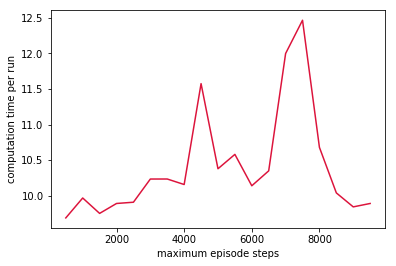

In [57]:
colors = plt.cm.jet(np.linspace(0, 1, 20))
plot_results = results_complex_max_epochs
c_index = np.linspace(1, 20)

for i in range(1, 20, 5):
    plt.scatter(plot_results['output'][i][2]['episode_list'], plot_results['output'][i][2]['epochs'], color=colors[i], 
                alpha=0.1, label="max_episodes = {}".format(plot_results['max_episode_steps'][i]))

plt.ylabel('number of epochs')
plt.xlabel('episode list')
plt.legend()
plt.show()

for i in range(1, 20, 5):
    plt.scatter(plot_results['output'][i][2]['episode_list'], plot_results['output'][i][2]['comp_times'], color=colors[i], 
                alpha=0.1, label="max_episodes = {}".format(plot_results['max_episode_steps'][i]))
plt.ylabel('computation time')
plt.xlabel('episode list')
plt.legend()
plt.show()

for i in range(1, 20, 5):
    plt.scatter(plot_results['output'][i][2]['episode_list'], plot_results['output'][i][2]['penalties'], color=colors[i], 
                alpha=0.1, label="max_episodes = {}".format(plot_results['max_episode_steps'][i]))
plt.ylabel('penalties')
plt.xlabel('episode list')
plt.legend()
plt.show()

plt.plot(plot_results['max_episode_steps'], plot_results['steps'], color='purple')
plt.ylabel('average steps for optimal policy')
plt.xlabel('maximum episode steps')
#plt.legend()
plt.show()

plt.plot(plot_results['max_episode_steps'], plot_results['time'], color='crimson')
plt.ylabel('computation time per run')
plt.xlabel('maximum episode steps')
#plt.legend()
plt.show()

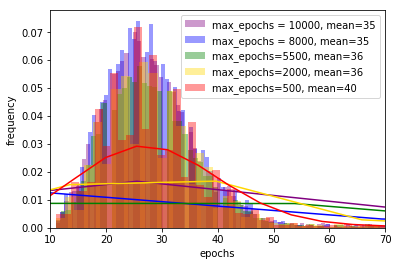

In [58]:
results_complex_max_epochs = np.load('results_complex_max_epochs.npy').item()
plot_results = results_complex_max_epochs

res1 = np.array(plot_results['output'][18][2]['epochs'])
res2 = np.array(plot_results['output'][14][2]['epochs'])
res3 = np.array(plot_results['output'][9][2]['epochs'])
res4 = np.array(plot_results['output'][4][2]['epochs'])
res5 = np.array(plot_results['output'][0][2]['epochs'])

truncate = False
if truncate:
    res1 = res1[res1<100]
    res2 = res2[res2<100]
    res3 = res3[res3<100]
    res4 = res4[res4<100]
    res5 = res5[res5<100]


sns.distplot(res1, color='purple', bins=10000, norm_hist=True, kde=True,
             label='max_epochs = 10000, mean={:.0f}'.format(np.average(res1, weights=(res1 < 1000))))
sns.distplot(res2, color='blue', bins=8000, norm_hist=True, kde=True,
             label='max_epochs = 8000, mean={:.0f}'.format(np.average(res2, weights=(res2 < 1000))))
sns.distplot(res3, color='green', bins=5500, norm_hist=True, kde=True,
             label='max_epochs=5500, mean={:.0f}'.format(np.average(res3, weights=(res3 < 1000))))
sns.distplot(res4, color='gold', bins=1500, norm_hist=True, kde=True,
             label='max_epochs=2000, mean={:.0f}'.format(np.average(res4, weights=(res4 < 1000))))
sns.distplot(res5, color='red', bins=350, norm_hist=True, kde=True,
             label='max_epochs=500, mean={:.0f}'.format(np.average(res5, weights=(res5 < 1000))))

plt.ylabel('frequency')
plt.xlabel('epochs')
#plt.xscale('log')
plt.xlim(10, 70)
plt.legend()
plt.show()

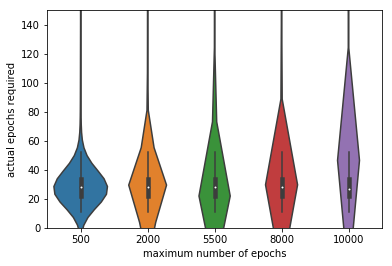

In [67]:
# violin test
import pandas as pd
df = pd.DataFrame(np.array([res1, res2, res3, res4, res5][::-1]).T, 
                  columns=['10000', '8000', '5500', '2000', '500'][::-1])
ax = sns.violinplot(data=df, scale='area')
plt.ylim(0, 150)
plt.xlabel('maximum number of epochs')
plt.ylabel('actual epochs required')
plt.show()

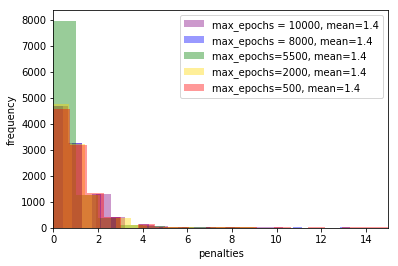

In [26]:
results_complex_max_epochs = np.load('results_complex_max_epochs.npy').item()
plot_results = results_complex_max_epochs
kde = False
sns.distplot(plot_results['output'][18][2]['penalties'], color='purple', bins=1500, kde=kde, 
             label='max_epochs = 10000, mean={:.1f}'.format(np.mean(plot_results['output'][18][2]['penalties'])))
sns.distplot(plot_results['output'][14][2]['penalties'], color='blue', bins=1700, kde=kde, 
             label='max_epochs = 8000, mean={:.1f}'.format(np.mean(plot_results['output'][14][2]['penalties'])))
sns.distplot(plot_results['output'][9][2]['penalties'], color='green', bins=800, kde=kde, 
             label='max_epochs=5500, mean={:.1f}'.format(np.mean(plot_results['output'][9][2]['penalties'])))
sns.distplot(plot_results['output'][4][2]['penalties'], color='gold', bins=600, kde=kde, 
             label='max_epochs=2000, mean={:.1f}'.format(np.mean(plot_results['output'][4][2]['penalties'])))
sns.distplot(plot_results['output'][0][2]['penalties'], color='red', bins=150, kde=kde, 
             label='max_epochs=500, mean={:.1f}'.format(np.mean(plot_results['output'][4][2]['penalties'])))

plt.ylabel('frequency')
plt.xlabel('penalties')
#plt.xscale('log')
#plt.ylim(0, 3)
plt.xlim(0, 15)
plt.legend()
plt.show()

In [ ]:
'''     results['output']['epochs'].append(epochs)
        results['output']['penalties'].append(penalties)
        results['output']['comp_times'].append(time.time()-t0)
        results['output']['episode_list'].append(i)
'''

In [16]:
results_l = defaultdict(list)
results_s = defaultdict(list)
results_c = defaultdict(list)

alpha = 0.9
gamma = 0.8
param_name = 'epsilon'
for param in [0.05*i for i in range(1, 10)]:
    print("{} = {}".format(param_name, param))
    env3._max_episode_steps = 1000
    t0 = time.time()
    q_large = u5.Q_learning_train(env2, alpha=alpha, gamma=gamma, epsilon=param, episodes=10001, verbose=False)
    t1 = time.time()-t0
    t0 = time.time()
    q_small = u5.Q_learning_train(env, alpha=alpha, gamma=gamma, epsilon=param, episodes=10001, verbose=False)
    t2 = time.time()-t0
    t0 = time.time()
    q_complex = u5.Q_learning_train(env3, alpha=alpha, gamma=gamma, epsilon=param, episodes=10001, verbose=False)
    t3 = time.time()-t0
    
    policy_large, _, _ = q_large
    policy_small, _, _ = q_small
    policy_complex, _, _ = q_complex
    
    results_l['output'].append(q_large)
    results_l[param_name].append(param)
    results_l['time'].append(t1)
    results_l['steps'].append(np.mean([u5.count(policy_large, env2) for i in range(1000)]))
    results_s['output'].append(q_small)
    results_s[param_name].append(param)
    results_s['time'].append(t2)
    results_s['steps'].append(np.mean([u5.count(policy_small, env) for i in range(1000)]))
    results_c['output'].append(q_complex)
    results_c[param_name].append(param)
    results_c['time'].append(t3)
    results_c['steps'].append(np.mean([u5.count(policy_complex, env3) for i in range(1000)]))

results_large_eps = results_l
results_small_eps = results_s
results_complex_eps = results_c

np.save('results_complex_eps', results_complex_eps)
np.save('results_large_eps', results_large_eps)
np.save('results_small_eps', results_small_eps)

print('finished')

epsilon = 0.05


epsilon = 0.1


epsilon = 0.15000000000000002


epsilon = 0.2


epsilon = 0.25


epsilon = 0.30000000000000004


epsilon = 0.35000000000000003


epsilon = 0.4


epsilon = 0.45


finished


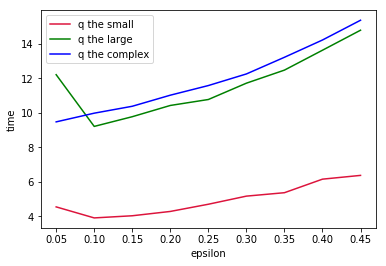

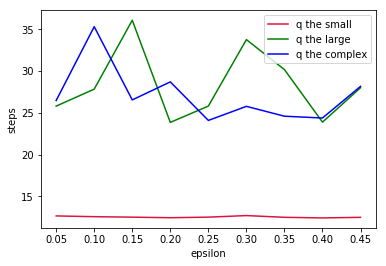

In [70]:
results_complex_eps = np.load('results_complex_eps.npy').item()
results_large_eps = np.load('results_large_eps.npy').item()
results_small_eps = np.load('results_small_eps.npy').item()


for param in ['time', 'steps']:
    plt.plot(results_small_eps['epsilon'], results_small_eps[param], color="crimson", label="q the small")
    plt.plot(results_large_eps['epsilon'], results_large_eps[param], color="green", label="q the large")
    plt.plot(results_complex_eps['epsilon'], results_complex_eps[param], color="blue", label="q the complex")
    plt.ylabel(param)
    plt.xlabel('epsilon')
    plt.legend()
    plt.show()

In [16]:
results_large_eps = results_l
results_small_eps = results_s
results_complex_eps = results_c

np.save('results_complex_eps', results_complex_eps)
np.save('results_large_eps', results_large_eps)
np.save('results_small_eps', results_small_eps)

40000